<div align="center">
    <h2>Graduate Rotational Internship Program</h2>
    <h2>@The Spark Foundation</h2>
    <h3>Task#1: Prediction using Supervised ML (Level- Beginner)</h3>
    <h3>Author: Arsal Raza</h3>
</div><br>


#### Predict the percentage of an student based on the no. of study hours. As target variable include numbers so this is a simple linear regression task as it involves just 2 variables. 

**Data Source:**
[Student Scores Dataset](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)


****Task:****

### What will be predicted score if a student studies for 9.25 hrs/ day?

### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2. Load the data

In [2]:
# Load the data from the given URL
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

### 3. Explore and Visualize the Data

In [3]:
data.shape

(25, 2)

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
# Summary statistics
data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [6]:
# Check for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

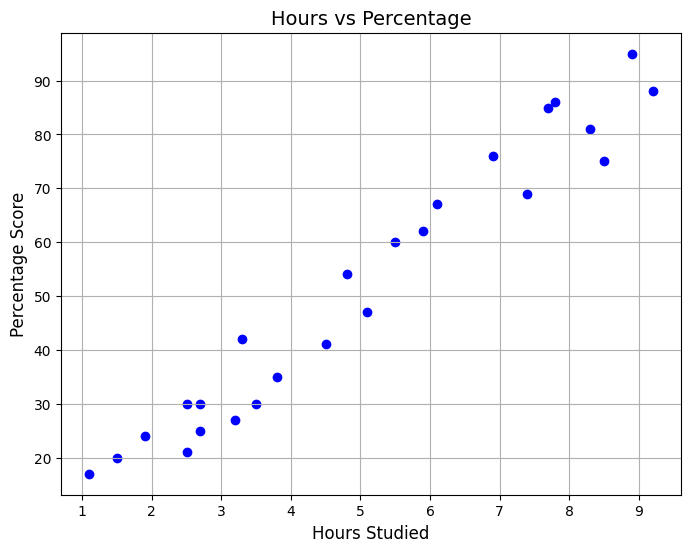

In [7]:
# Plotting the data points
plt.figure(figsize=(8,6))
plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.title('Hours vs Percentage', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Percentage Score', fontsize=12)
plt.grid(True)
plt.show()

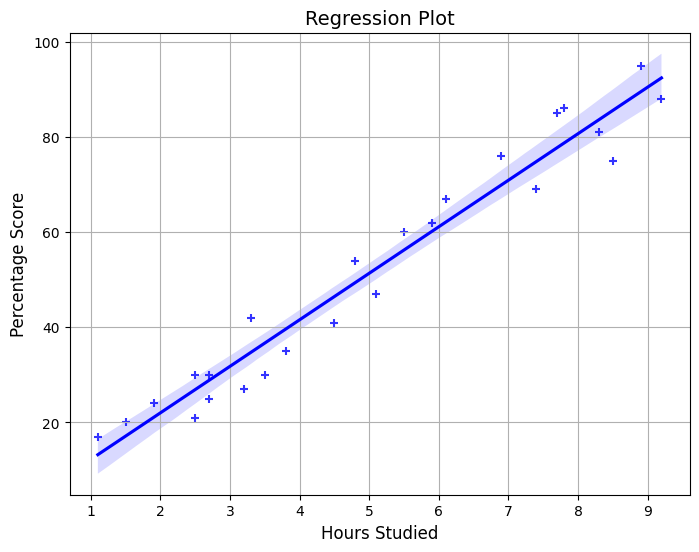

In [8]:
# Using seaborn to plot a regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Hours', y='Scores', data=data, color='blue', marker='+')
plt.title('Regression Plot', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Percentage Score', fontsize=12)
plt.grid(True)
plt.show()

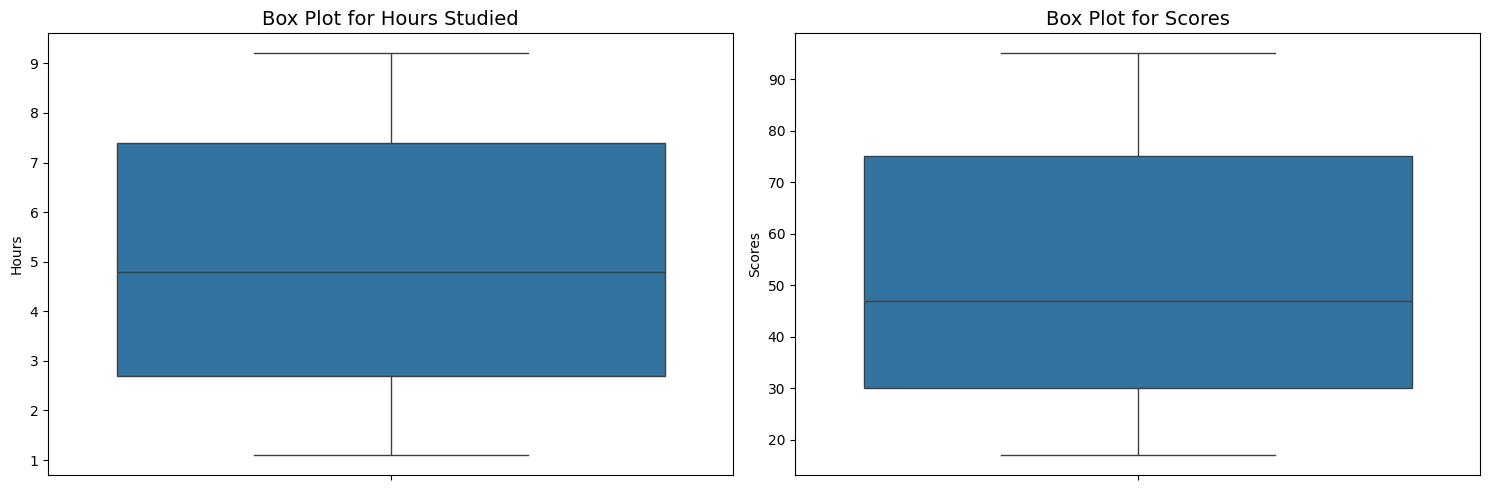

In [9]:
#subplot for box plot to detact outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot for hours
sns.boxplot(data['Hours'], ax=axes[0])
axes[0].set_title('Box Plot for Hours Studied', fontsize=14)

# Box plot for scores
sns.boxplot(data['Scores'], ax=axes[1])
axes[1].set_title('Box Plot for Scores', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()

In [10]:
data.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

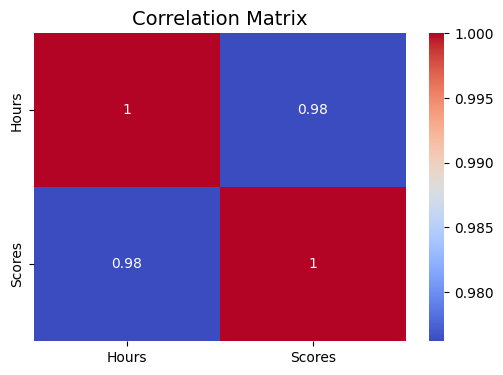

In [11]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### 4. Prepare the Data for Modeling

In [12]:
X = data[['Hours']]  # Input feature (hours)
y = data['Scores']   # Output label (scores)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 5. Train the Linear Regression Model

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 6. Make Predictions

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Compare actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
5       20  16.884145
2       27  33.732261
19      69  75.357018
16      30  26.794801
11      62  60.491033

### 7. Evaluate the Model

In [15]:
# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


### 8. Predict the Score for 9.25 Hours/Day

In [16]:
# Predict the score for 9.25 hours/day
hours = np.array([[9.25]])
predicted_score = model.predict(hours)

print(f'Predicted score for a student who studies 9.25 hours/day: {predicted_score[0]:.2f}')


Predicted score for a student who studies 9.25 hours/day: 93.69


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Answer: Model predicts the student who studeies for 9.25 hours/day has a chance to score 93.69 .